In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
import time

### Let's take a look at the top teams in Ligue 1

In [2]:
#data cleaning
df = pd.read_csv("ligue1TopGoals.csv")
df = df.head(n=6)
df = df.drop(columns=['Unnamed: 0', 'YC', 'RC', 'F', 'OFF', 'HG', 'KG'])
df.rename(columns={'STANDARD':'Name', 'GP': 'Games', 'GF':'Goals', 'A':'Assists', 'SOG':'Shots on Goal', 'S':'Total Shots'}, inplace=True)
for i in range(6):
    if(df.at[i, 'Name'].split()[1] == df.at[i, 'Name'].split()[2]):
        df.at[i, 'Name'] = df.at[i, 'Name'].split()[1]
    else:
        df.at[i, 'Name'] = df.at[i, 'Name'].split()[1] + df.at[i, 'Name'].split()[2]
    df.at[i, 'Goals/Game'] = (df.at[i, 'Goals']/df.at[i, 'Games'])
print(df)

            Name  Games  Goals  Assists  Shots on Goal  Total Shots  \
0        ParisSG     38    105       70            220          557   
1           Lyon     38     70       51            256          641   
2          Lille     38     68       47            201          478   
3      Marseille     38     60       45            180          517   
4     St.Etienne     38     59       39            183          485   
5  StrasbourgSTR     38     58       43            159          386   

   Goals/Game  
0    2.763158  
1    1.842105  
2    1.789474  
3    1.578947  
4    1.552632  
5    1.526316  


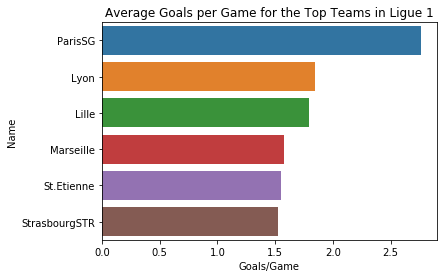

In [3]:
#visualization of top scorers per game
#df1 = df.sort_values(['Goals/Game'])
bar1 = sns.barplot(x='Goals/Game', y='Name', data=df)
#bar1.set_xticklabels(bar1.get_xticklabels(),rotation=90)
plt.title('Average Goals per Game for the Top Teams in Ligue 1')
plt.show()

In [4]:
#create 2 new columns for shooting accuracy and coversion rate
#shooting accuracy is given by (shots on goal/total shots)*100%
#conversion rate is given by (goals/shots on goal)*100%
for i in range(6):
    df.at[i, 'Shooting Accuracy(%)'] = (df.at[i, 'Shots on Goal']/df.at[i, 'Total Shots'])*100
    df.at[i, 'Conversion Rate(%)'] = (df.at[i, 'Goals']/df.at[i, 'Shots on Goal'])*100
print(df)

            Name  Games  Goals  Assists  Shots on Goal  Total Shots  \
0        ParisSG     38    105       70            220          557   
1           Lyon     38     70       51            256          641   
2          Lille     38     68       47            201          478   
3      Marseille     38     60       45            180          517   
4     St.Etienne     38     59       39            183          485   
5  StrasbourgSTR     38     58       43            159          386   

   Goals/Game  Shooting Accuracy(%)  Conversion Rate(%)  
0    2.763158             39.497307           47.727273  
1    1.842105             39.937598           27.343750  
2    1.789474             42.050209           33.830846  
3    1.578947             34.816248           33.333333  
4    1.552632             37.731959           32.240437  
5    1.526316             41.191710           36.477987  


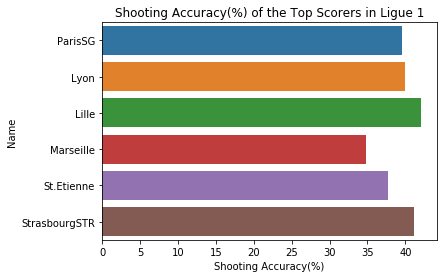

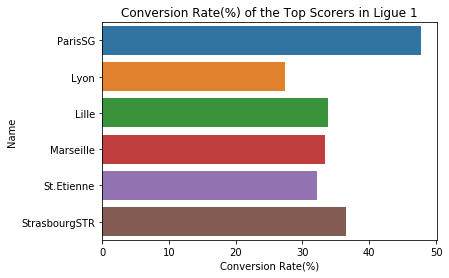

In [5]:
#visualization of top scorers' shooting accuracy and conversion rate
#df2 = df.sort_values(['Shooting Accuracy(%)'])
bar2 = sns.barplot(x='Shooting Accuracy(%)', y='Name', data=df)
plt.title('Shooting Accuracy(%) of the Top Scorers in Ligue 1')
plt.show()

#df3 = df.sort_values(['Conversion Rate(%)'])
bar3 = sns.barplot(x='Conversion Rate(%)', y='Name', data=df)
plt.title('Conversion Rate(%) of the Top Scorers in Ligue 1')
plt.show()